# Some toy examples with simple random walk/brownian motion

**References:**
- MIT 18.S096 - Topics in Mathematics with Applications in Finance

    - https://ocw.mit.edu/courses/mathematics/18-s096-topics-in-mathematics-with-applications-in-finance-fall-2013/video-lectures/lecture-5-stochastic-processes-i/
    - https://ocw.mit.edu/courses/mathematics/18-s096-topics-in-mathematics-with-applications-in-finance-fall-2013/video-lectures/lecture-17-stochastic-processes-ii/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

In [2]:
def generate_simple_random_walk(nsteps=10):
    
    X = [0]
    
    for i in range(nsteps):
        direction = (np.random.randint(0, 2)-0.5)*2.0
        X.append(X[-1]+direction)
        
    return X

In [3]:
nsteps, nwalks = 1000, 1000
walk_ensemble = [generate_simple_random_walk(nsteps=nsteps) for i in range(nwalks)]

In [4]:
t = np.linspace(0.0, nsteps, nsteps)
stddev_curve = np.sqrt(t)

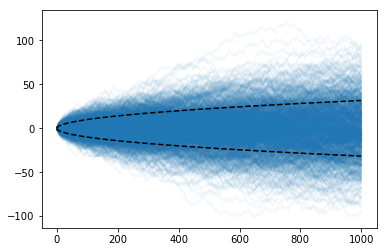

In [5]:
f,a = plt.subplots()

for walk in walk_ensemble:
    a.plot(walk, alpha=0.05, c='C0')
a.plot(stddev_curve, c='black', linestyle='--')
a.plot(-stddev_curve, c='black', linestyle='--')

------------------------_

\begin{equation}
    M(T)
    =
    max_{ 0 < s< t} \left\{ B(t) \right\}
\end{equation}

\begin{equation}
    P[M(t) > a]
    =
    2 P[B(t) > a]
    =
    2\left[ 1 - \Phi(\frac{a}{\sqrt{t}}) \right]
\end{equation}

In [6]:
def prob_Mt_more_than_y(y):
    phi = scipy.stats.norm.cdf(y)
    p = 2.0*(1-phi)
    return p

In [7]:
def calc_freq_of_walks_above_a(walks, a):
    count = 0

    for walk in walks:
        if max(walk) > a:
            count += 1
    return count/len(walks)

In [8]:
t = nsteps

In [9]:
a = np.linspace(0.0, 75.0, 100)
y = a/np.sqrt(t)

In [10]:
p = prob_Mt_more_than_y(y)

In [11]:
freq = np.array([calc_freq_of_walks_above_a(walk_ensemble, ai) for ai in a])

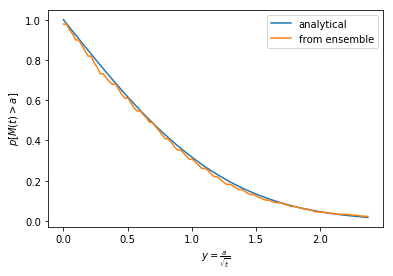

In [12]:
f,a = plt.subplots()
a.plot(y,p,    label='analytical')
a.plot(y,freq, label='from ensemble')
a.set_xlabel(r'$y=\frac{a}{\sqrt{t}}$')
a.set_ylabel(r'$p[M(t) > a]$')
plt.legend()

In [13]:
prob_Mt_more_than_y(1)

0.31731050786291415

In [14]:
prob_Mt_more_than_y(2)

0.04550026389635842

In [15]:
prob_Mt_more_than_y(3)

0.002699796063260207